In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing

import statsmodels.api as sm
import pylab

from functions import *

In [2]:
data = pd.read_excel('data.xlsx')

In [3]:
random.seed(240)
data = data.loc[(data['drug_name'] == 'Gemcitabine') & (data['cell_line'] == 'OCUBM')][['Drug_concentration (µM)',
                                                                               'viability1', 'viability2', 'viability3', 'viability4', 'viability5','viability6']]
#data.reset_index(drop=True)

X = np.log10(sum([data['Drug_concentration (µM)'].values.tolist()]*6,[]))
y= sum([data.iloc[:,i].values.tolist() for i in range(1,7)],[])

df = pd.DataFrame({'y':y,'X':X })

h= 0.2

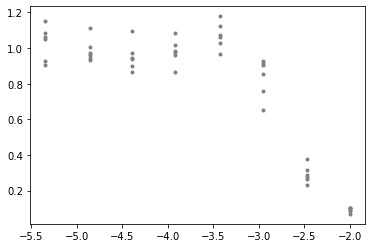

In [4]:
fig, ax = plt.subplots(1, 1)
ax.plot(X, y, 'o', color='grey',markersize=3)

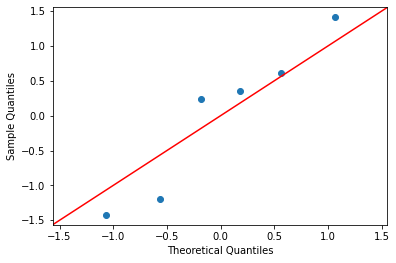

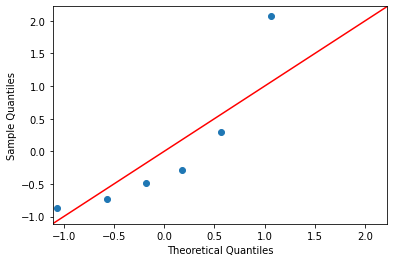

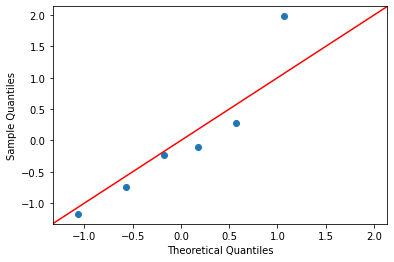

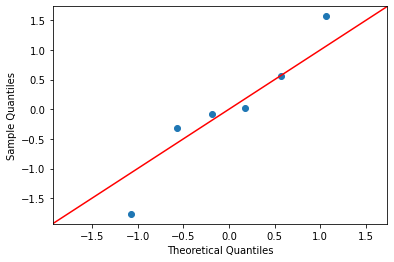

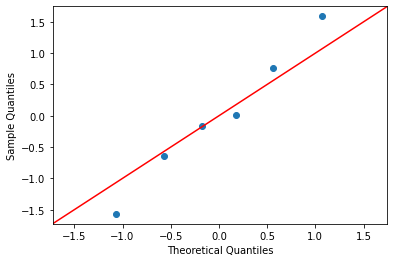

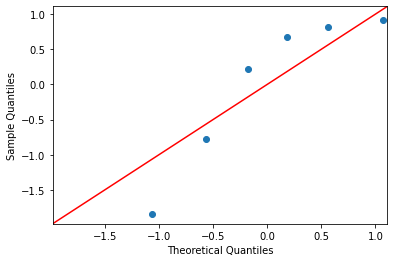

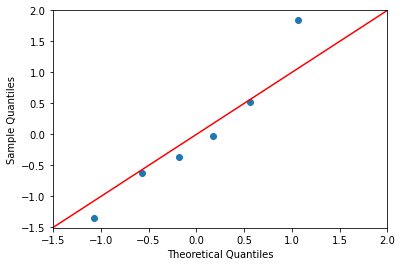

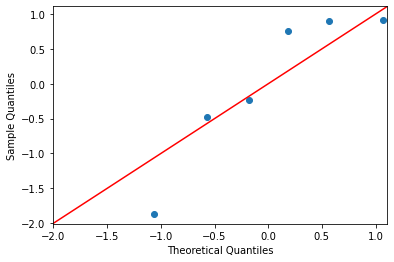

In [5]:
y_batch = []

for x in df.X.unique():
    #print(x)
    y_batch.append(df.loc[df.X ==x].y.values)
    
for y in y_batch:
    sm.qqplot(preprocessing.scale(y), line='45')

In [6]:
new_y_batch = []

new_x_batch = []

for x,y in zip(df.X.unique(),y_batch):
    new_x_batch.append([x]*50)
    new_y_batch.append(np.random.normal(loc=np.mean(y), scale=np.std(y), size=50).tolist())  

In [7]:
### Generate additional data 

In [8]:
df_boot = pd.DataFrame({'y':sum(new_y_batch, []),'X':sum(new_x_batch, [])})

In [9]:
df1 = pd.concat([df,df_boot])

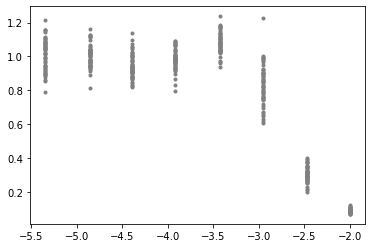

In [10]:
fig, ax = plt.subplots(1, 1)
ax.plot(df1.X, df1.y, 'o', color='grey',markersize=3)

In [11]:
omega = bernoulli.rvs(pi(df1.y,1,1), size=len(df1))

In [14]:
pi_hat = [pi_hat(h,z,df1.y,pi(df1.y,1,1),omega) for z in np.linspace(-1.5, 1.5, len(df1))]


Prior Z-Scoring before fit


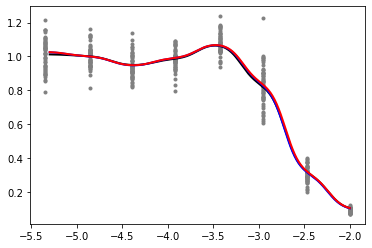

In [16]:
print('Prior Z-Scoring before fit')

fig, ax = plt.subplots(1, 1)
ax.plot(df1.X, df1.y, 'o', color='grey',markersize=3)
#NW
ax.plot(np.linspace(-5.3, -2, len(df1)),[nw(h,t,df1.X,df1.y) for t in np.linspace(-5.3, -2,len(df1))],color= 'black', lw=2)
#HT NW
ax.plot(np.linspace(-5.3, -2, len(df1)),[nw_mis(h,t,df1.X,df1.y,pi(df1.y,1,1),omega) for t in np.linspace(-5.3, -2, len(df1))],'-g',color= 'blue', lw=2)
ax.plot(np.linspace(-5.3, -2, len(df1)),[nw_mis(h,t,df1.X,df1.y,pi_hat,omega) for t in np.linspace(-5.3, -2, len(df1))],'-g',color= 'red', lw=2)

In [23]:
#Estimated regression functions 

m_hat_nw = [nw(h,t,df1.X,df1.y) for t in df1.X ]
m_hat_hw = [nw_mis(h,t,df1.X,df1.y,pi(df1.y,1,1),omega) for t in df1.X ]

m_hat_hw_est = [nw_mis(h,t,df1.X,df1.y,pi_hat,omega) for t in df1.X]

r_hat = (df1.y-m_hat_nw)**2

r_hat_hw = (df1.y-m_hat_hw)**2

r_hat_hw_est = (df1.y-m_hat_hw_est)**2

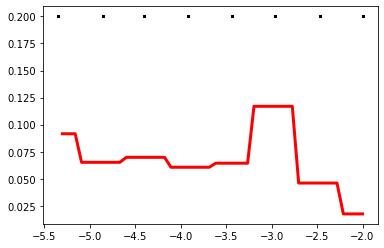

In [25]:
h1 = 0.01

n= len(df)

fig, ax = plt.subplots(1, 1)

ax.plot(df1.X,sigma_reg(df1.X,len(df)),'o', color='black',markersize=1)
ax.plot(np.linspace(-5.3, -2, n),[sigma_res(h1,t,df1.X,r_hat) for t in np.linspace(-5.3, -2, n)],color= 'red', lw=3)

#ax.plot(np.linspace(-5.3, -2, n),[sigma_mis_res(h1,t,df.X,r_hat_hw,pi(df.y,1,1),omega) for t in np.linspace(-5.3, -2, n)],'-g',color= 'blue', lw=1)
#ax.plot(np.linspace(-5.3, -2, n),[sigma_mis_res(h1,t,df.X,r_hat_hw_est,pi_hat,omega) for t in np.linspace( -5.3, -2, n)],'-g',color= 'grey', lw=1)
#ax.plot()

